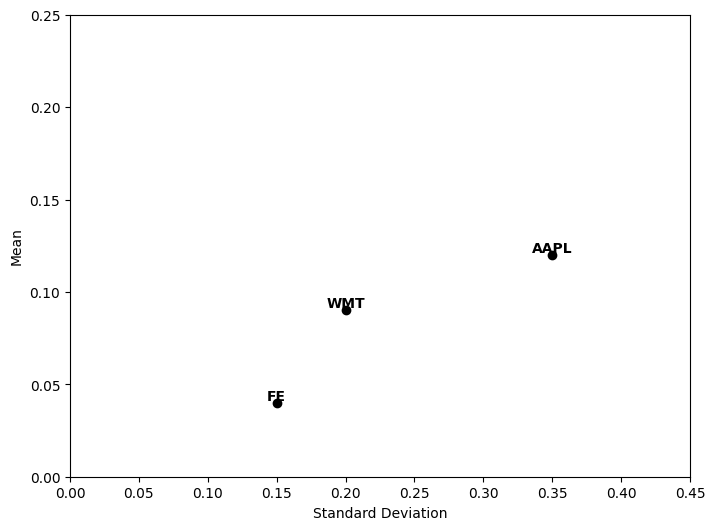

In [2]:
# Chapter 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
stocks = ['FE', 'WMT', 'AAPL']
mu = [0.04, 0.09, 0.12]
sigma = [0.15, 0.20, 0.35]
 
def plot_points(mu, sigma, stocks):
    plt.figure(figsize=(8,6))
    plt.scatter(sigma, mu, c='black')
    plt.xlim(0,.45)
    plt.ylim(0,.25)
    plt.ylabel('Mean')
    plt.xlabel('Standard Deviation')
    for i, stock in enumerate(stocks):
        plt.annotate(stock, (sigma[i], mu[i]), ha='center', va='bottom', weight='bold')
        
plot_points(mu, sigma, stocks)
plt.show()

In [3]:
# Chapter 2.1

# The @ operator is matrix multiplication

w = np.array([0.2, 0.3, 0.5])
mu_p = mu @ w.T
ret_sec = mu * w
print('Expected portfolio return: ', mu_p)
print('Expected instrument return: ', ret_sec)

Expected portfolio return:  0.095
Expected instrument return:  [0.008 0.027 0.06 ]


In [4]:
print(sigma)
print(np.diag(sigma))

Corr = [[ 1.  ,  0.1 ,  0.17],
        [ 0.1 ,  1.  ,  0.26],
        [ 0.17,  0.26,  1.  ]]
 
Cov = np.diag(sigma) @ Corr @ np.diag(sigma)
print('Covariance matrix: \n', Cov)

sigma_p = (w.T @ Cov @ w) ** 0.5
print('Portfolio standard deviation, Method #1: ', sigma_p)

[0.15, 0.2, 0.35]
[[0.15 0.   0.  ]
 [0.   0.2  0.  ]
 [0.   0.   0.35]]
Covariance matrix: 
 [[0.0225   0.003    0.008925]
 [0.003    0.04     0.0182  ]
 [0.008925 0.0182   0.1225  ]]
Portfolio standard deviation, Method #1:  0.20671236053995415


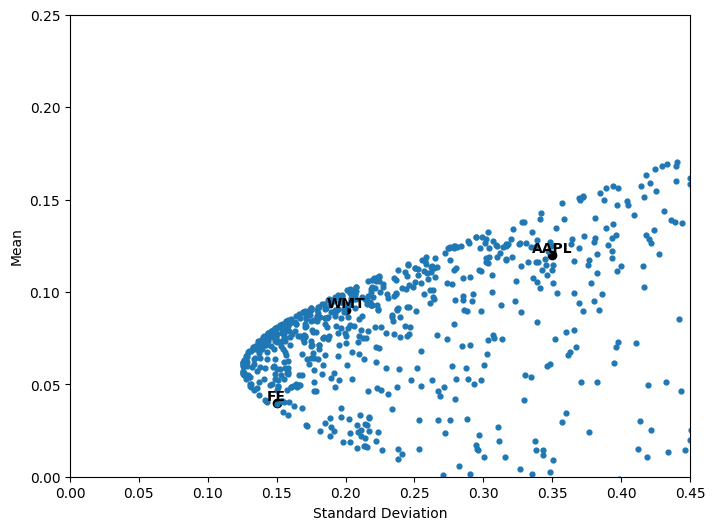

In [5]:
# Chapter 2.2
# Randomizing portfolio weights

def random_weights(n_assets):
    k = np.random.randn(n_assets)
    return k / sum(k)

def mu_sigma_portfolio(weights, means, Cov):
    mu_p = np.dot(weights, means)
    sigma_p = (weights @ Cov @ weights.T) ** 0.5
    return mu_p, sigma_p

def plot_random_portfolios(mu, Cov, n_simulations):
    N_assets = len(mu)
    mu_p_sims = []
    sigma_p_sims = []
    for i in range(n_simulations):
        w = random_weights(n_assets)
        mu_p, sigma_p = mu_sigma_portfolio(w, mu, Cov)
        mu_p_sims.append(mu_p)
        sigma_p_sims.append(sigma_p)
    plt.scatter(sigma_p_sims, mu_p_sims, s=12)
 
# plot original assets
plot_points(mu, sigma, stocks)
 
n_simulations = 1000
n_assets = 3 
plot_random_portfolios(mu, Cov, n_simulations)    
plt.show();

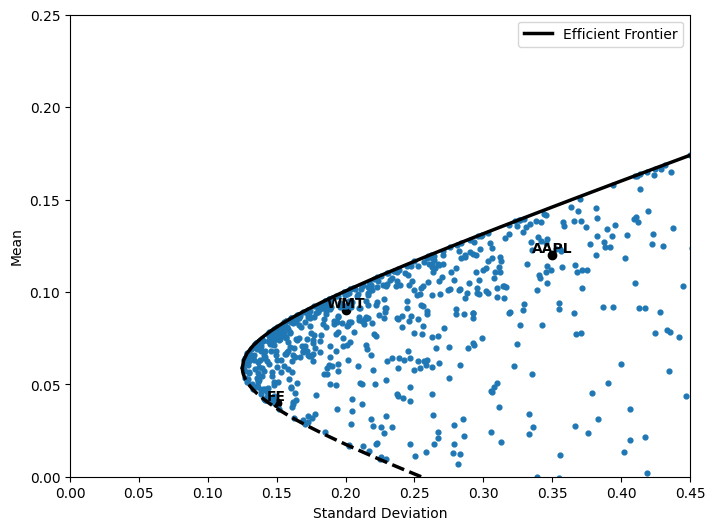

In [6]:
# Plot efficient frontier

def plot_min_var_frontier(mu, Cov):
    A,B,C = compute_ABC(mu, Cov)
    y = np.linspace(0,B/A,100)
    x = np.sqrt((A*y*y-2*B*y+C)/(A*C-B*B))
    plt.plot(x,y, color='black', lw=2.5, linestyle='--')
 
    y = np.linspace(B/A,.45,100)
    x = np.sqrt((A*y*y-2*B*y+C)/(A*C-B*B))
    plt.plot(x,y, color='black', lw=2.5, label="Efficient Frontier")
    plt.legend()
 
def compute_ABC(mu, Cov):
    '''
    Computes constants that I call A,B,C (derived in the Appendix).
    These are needed to plot the minimum-variance frontier.
    '''
    Cov_inv = np.linalg.inv(Cov)
    ones = np.ones(n_assets)
    A = ones @ Cov_inv @ ones
    B = ones @ Cov_inv @ mu
    C = mu @ Cov_inv @ mu
    return A,B,C
 
plot_points(mu, sigma, stocks)
plot_random_portfolios(mu, Cov, n_simulations)    
plot_min_var_frontier(mu, Cov)
plt.show()

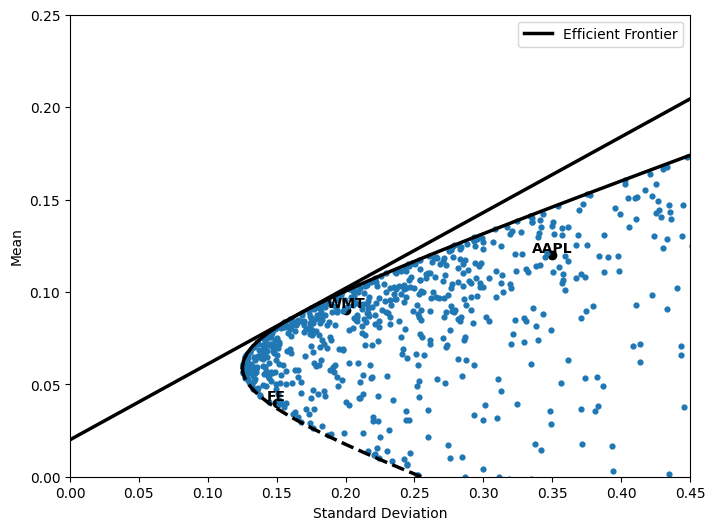

In [7]:
def plot_Capital_Allocation_Line(rf, mu, Cov):
    A,B,C = compute_ABC(mu, Cov)
    x = np.linspace(0,.45,100)
    y = rf + x*(C-2*B*rf+A*rf**2)**0.5
    plt.plot(x,y, color='black', lw=2.5)
 
plot_points(mu, sigma, stocks)
plot_random_portfolios(mu, Cov, n_simulations)    
plot_min_var_frontier(mu, Cov)
 
rf = 0.02
plot_Capital_Allocation_Line(rf, mu, Cov)
plt.show()

In [8]:
# Interactive risk impact on portfolio

from scipy.stats import norm
from ipywidgets import *
 
def update(pct_stock):
    wealth = 1000000
    mu = np.array([0.02, 0.10]) * wealth
    sigma = np.array([0.05, 0.20]) * wealth
    w = np.array([1-pct_stock/100, pct_stock/100])
    Corr = [[ 1. ,-0.1],
            [-0.1, 1. ]]
    Cov = np.diag(sigma) @ Corr @ np.diag(sigma)
 
    mu_p, sigma_p = mu_sigma_portfolio(w, mu, Cov)
    
    x = np.linspace(-2.2*sigma[1], +2.2*sigma[1], 100)
   
    arrowprops = dict(arrowstyle="simple", color='k')
    xp = -1.96*sigma_p + mu_p
    xp = round(xp,-3)
    yp = norm.pdf(xp, mu_p, sigma_p)
    plt.figure(figsize=(8,6)) 
    plt.annotate('95% Worst\n Case Loss:\n${:,.0f}'.format(xp), xy=(xp,yp),
             xycoords='data',
             xytext=(xp,yp*2.5),
             ha='center', va='bottom', size=12,
             arrowprops=arrowprops,
            )
    xp = mu_p
    xp = round(xp,-3)
    yp = norm.pdf(xp, mu_p, sigma_p)    
    plt.annotate('Average\n Gain:\n${:,.0f}'.format(mu_p), xy=(xp,yp),
             xycoords='data',
             xytext=(xp,yp*.8),
             ha='center', va='top', size=12,
             arrowprops=arrowprops,
            )
    plt.plot(x, norm.pdf(x, mu_p, sigma_p))
    plt.xlabel('Gains/Losses Over 1-Year Horizon')
    plt.ylabel('Probability Density')
    plt.show()
 
interact(
    update,
    pct_stock=widgets.IntSlider(value=50, min=0, max=100, step=10)
)